# **Mutiple Linear Regression Model**

The data consulting firm Automatidata has recently hired you as the newest member of their data analytics team. Their newest client, the NYC Taxi and Limousine Commission (New York City TLC), wants the Automatidata team to build a multiple linear regression model to predict taxi fares using existing data that was collected over the course of a year. The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and A/B testing.

The Automatidata team has reviewed the results of the A/B testing. Now it’s time to work on predicting the taxi fare amounts. You’ve impressed your Automatidata colleagues with your hard work and attention to detail. The data team believes that you are ready to build the regression model and update the client New York City TLC about your progress.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

**Course 5 End-of-course project: Build a multiple linear regression model**

In this activity, you will build a multiple linear regression model. As you've learned, multiple linear regression helps you estimate the linear relationship between one continuous dependent variable and two or more independent variables. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed. 

Completing this activity will help you practice planning out and buidling a multiple linear regression model based on a specific business need. The structure of this activity is designed to emulate the proposals you will likely be assigned in your career as a data professional. Completing this activity will help prepare you for those career moments.
<br/>

**The purpose** of this project is to demostrate knowledge of EDA and a multiple linear regression model

**The goal** is to build a multiple linear regression model and evaluate the model
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a multiple linear regression model?

**Part 2:** Model Building and evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

All of the above questions are answered in this notebook:

# Build a multiple linear regression model

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## PACE: **Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.


### Task 1. Imports and loading
Import the packages that you've learned are needed for building linear regression models.

In [1]:
# Imports
# Packages for numerics + dataframes
import pandas as pd
import numpy as np

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for date conversions for calculating trip durations
import datetime as dt

# Packages for OLS, MLR, confusion matrix
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

**Note:** `Pandas` is used to load the NYC TLC dataset. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe 
df = pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv", index_col=0) # index_col parameter specified to avoid "Unnamed: 0" column when reading in data from csv

<img src="images/Analyze.png" width="100" height="100" align=left>

## PACE: **Analyze**

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a multiple linear regression model?


* The purpose of EDA before model construction is to explore the data and understand information about data for example data types of variables, descriptive stats, shape of data, missing values from the data and presence of outliers in the data. 
* EDA and cleaning are crucial steps before constructing a model, if these steps are not performed then the model's results will not be accurate.
* EDA helps in selecting, extracting and transforming features to help increase performance of the model. 

### Task 2a. Explore data with EDA

Analyze and discover data, looking for correlations, missing data, outliers, and duplicates.

Start with `.shape` and `.info()`.

In [3]:
# Start with `.shape` and `.info()`
print('Dataframe Shape: ', df.shape, '\n')
df.info()

Dataframe Shape:  (22699, 17) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22699 entries, 24870114 to 17208911
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               22699 non-null  int64  
 1   tpep_pickup_datetime   22699 non-null  object 
 2   tpep_dropoff_datetime  22699 non-null  object 
 3   passenger_count        22699 non-null  int64  
 4   trip_distance          22699 non-null  float64
 5   RatecodeID             22699 non-null  int64  
 6   store_and_fwd_flag     22699 non-null  object 
 7   PULocationID           22699 non-null  int64  
 8   DOLocationID           22699 non-null  int64  
 9   payment_type           22699 non-null  int64  
 10  fare_amount            22699 non-null  float64
 11  extra                  22699 non-null  float64
 12  mta_tax                22699 non-null  float64
 13  tip_amount             22699 non-null  float64
 14  tolls_amount

Check for missing data and duplicates using `.isna()` and `.drop_duplicates()`.

In [4]:
# Check for missing data and duplicates using .isna() and .drop_duplicates()
df = df.drop_duplicates()
print(df.isna().sum())

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64


Use `.describe()`.

In [5]:
# Use .describe()
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


* The minimum value of fare amount is negative which is suspicious.

### Task 2b. Convert pickup & dropoff columns to datetime


In [6]:
# Check the format of the data
print(df['tpep_dropoff_datetime'].iloc[0], '\n\n')
print(df['tpep_pickup_datetime'].iloc[0])

03/25/2017 9:09:47 AM 


03/25/2017 8:55:43 AM


In [7]:
# Convert datetime columns to datetime
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22699 entries, 24870114 to 17208911
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               22699 non-null  int64         
 1   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 3   passenger_count        22699 non-null  int64         
 4   trip_distance          22699 non-null  float64       
 5   RatecodeID             22699 non-null  int64         
 6   store_and_fwd_flag     22699 non-null  object        
 7   PULocationID           22699 non-null  int64         
 8   DOLocationID           22699 non-null  int64         
 9   payment_type           22699 non-null  int64         
 10  fare_amount            22699 non-null  float64       
 11  extra                  22699 non-null  float64       
 12  mta_tax                22699 non-null  float64    

### Task 2c. Create duration column

Create a new column called `duration` that represents the total number of minutes that each taxi ride took.

In [9]:
# Create `duration` column
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df['duration'] = df['duration'].dt.total_seconds()/60

### Outliers

Call `df.info()` to inspect the columns and decide which ones to check for outliers.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22699 entries, 24870114 to 17208911
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               22699 non-null  int64         
 1   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 3   passenger_count        22699 non-null  int64         
 4   trip_distance          22699 non-null  float64       
 5   RatecodeID             22699 non-null  int64         
 6   store_and_fwd_flag     22699 non-null  object        
 7   PULocationID           22699 non-null  int64         
 8   DOLocationID           22699 non-null  int64         
 9   payment_type           22699 non-null  int64         
 10  fare_amount            22699 non-null  float64       
 11  extra                  22699 non-null  float64       
 12  mta_tax                22699 non-null  float64    

Keeping in mind that many of the features will not be used to fit your model, the most important columns to check for outliers are likely to be:
* `trip_distance`
* `fare_amount`
* `duration`



### Task 2d. Box plots

Plot a box plot for each feature: `trip_distance`, `fare_amount`, `duration`.

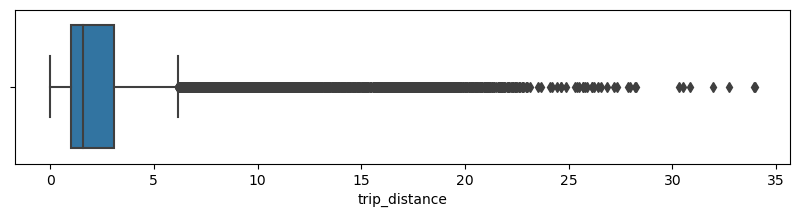

In [11]:
plt.figure(figsize=(10,2))
fig = sns.boxplot(x=df['trip_distance'])
plt.show()

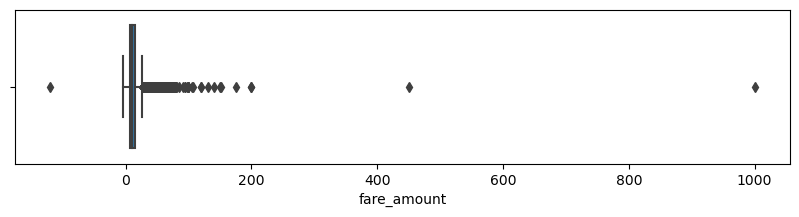

In [12]:
plt.figure(figsize=(10,2))
fig = sns.boxplot(x=df['fare_amount'])
plt.show()

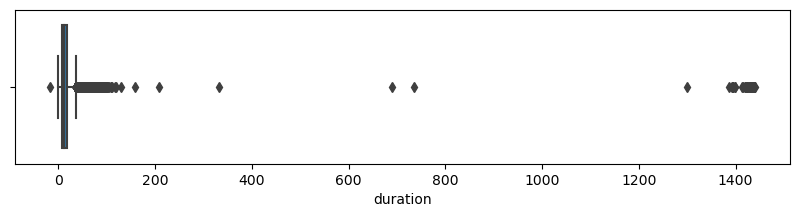

In [13]:
plt.figure(figsize=(10,2))
fig = sns.boxplot(x=df['duration'])
plt.show()

1. The variables trip_distance, fare_amount and duration contain outliers.
2. Some of the values in trip_distance are extreme outliers above 30 miles.
3. The negative values in distance, fares and duration does not make any sense. Although the distances, fares and durations of value zeros are somewhat considered.

### Task 2e. Imputations

#### `trip_distance` outliers

You know from the summary statistics that there are trip distances of 0. Are these reflective of erroneous data, or are they very short trips that get rounded down?

To check, sort the column values, eliminate duplicates, and inspect the least 10 values. Are they rounded values or precise values?

In [14]:
# Are trip distances of 0 bad data or very short trips rounded down?
df[(df['trip_distance']>0) & (df['trip_distance']<0.1)].head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
111191930,2,2017-01-14 19:04:51,2017-01-14 19:05:01,2,0.02,1,N,106,106,2,2.5,0.0,0.5,0.0,0.0,0.3,3.3,0.166667
70604386,2,2017-08-21 11:23:01,2017-08-21 11:24:46,2,0.07,1,N,161,161,2,3.0,0.0,0.5,0.0,0.0,0.3,3.8,1.750000
24848461,2,2017-03-25 04:37:43,2017-03-25 04:37:49,1,0.04,1,N,264,24,2,2.5,0.5,0.5,0.0,0.0,0.3,3.8,0.100000
65003313,2,2017-07-31 22:29:16,2017-07-31 22:29:39,1,0.07,1,N,237,162,2,2.5,0.5,0.5,0.0,0.0,0.3,3.8,0.383333
57337183,2,2017-07-05 11:02:23,2017-07-05 11:03:00,1,0.04,1,N,79,79,3,-2.5,0.0,-0.5,0.0,0.0,-0.3,-3.3,0.616667


The distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind. Besides, are there enough zero values in the data to pose a problem?

Calculate the count of rides where the `trip_distance` is zero.

In [15]:
df[df['trip_distance']==0].count()[1]

148

* 148 is relatively a small number compared to other values in the data. The number of values that have trip distance almost zero will not significantly affect the model performance. Therefore this feature will remain untouched with regard to outliers.

#### `fare_amount` outliers

In [16]:
df['fare_amount'].describe()

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

* The negative values in the fare amount column does not make any sense.
* Some values in the column are too high around $1000, Although the mean and median are 13.02, 9.5.
* We should deal with these anamolies.

Impute values less than $0 with `0`.

In [17]:
# Impute values less than $0 with 0
def negative_val(val):
    if val<0:
        return 0
    else:
        return val
    
df['fare_amount'] =  [negative_val(val) for val in df['fare_amount']]

Now impute the maximum value as `Q3 + (6 * IQR)`.

In [18]:
Q3 = np.percentile(df['fare_amount'], 75)
Q1 = np.percentile(df['fare_amount'], 25)

IQR = Q3 - Q1

high_values = Q3 + (6 * IQR) 

def high_val_fun(val):
    if val>high_values:
        return high_values
    else:
        return val

df['fare_amount'] = [high_val_fun(val) for val in df['fare_amount']]
df['fare_amount'].describe()

count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64

#### `duration` outliers


In [19]:
# Call .describe() for duration outliers
df['duration'].describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

The `duration` column has problematic values at both the lower and upper extremities.

* **Low values:** There should be no values that represent negative time. Impute all negative durations with `0`.

* **High values:** Impute high values the same way you imputed the high-end outliers for fares: `Q3 + (6 * IQR)`.

In [20]:
# Impute a 0 for any negative values
df['duration'] = [negative_val(val) for val in df['duration']]

In [21]:
# Impute the high outliers
Q3 = np.percentile(df['duration'], 75)
Q1 = np.percentile(df['duration'], 25)

IQR = Q3 - Q1

high_values = Q3 + (6 * IQR) 

def high_val_fun(val):
    if val>high_values:
        return high_values
    else:
        return val

df['duration'] = [high_val_fun(val) for val in df['duration']]
df['duration'].describe()

count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64

### Task 3a. Feature engineering

#### Create `mean_distance` column

When deployed, the model will not know the duration of a trip until after the trip occurs, so you cannot train a model that uses this feature. However, you can use the statistics of trips you *do* know to generalize about ones you do not know.

In this step, create a column called `mean_distance` that captures the mean distance for each group of trips that share pickup and dropoff points.

For example, if your data were:

|Trip|Start|End|Distance|
|--: |:---:|:-:|    |
| 1  | A   | B | 1  |
| 2  | C   | D | 2  |
| 3  | A   | B |1.5 |
| 4  | D   | C | 3  |

The results should be:
```
A -> B: 1.25 miles
C -> D: 2 miles
D -> C: 3 miles
```

Notice that C -> D is not the same as D -> C. All trips that share a unique pair of start and end points get grouped and averaged.

Then, a new column `mean_distance` will be added where the value at each row is the average for all trips with those pickup and dropoff locations:

|Trip|Start|End|Distance|mean_distance|
|--: |:---:|:-:|  :--   |:--   |
| 1  | A   | B | 1      | 1.25 |
| 2  | C   | D | 2      | 2    |
| 3  | A   | B |1.5     | 1.25 |
| 4  | D   | C | 3      | 3    |


Begin by creating a helper column called `pickup_dropoff`, which contains the unique combination of pickup and dropoff location IDs for each row.

One way to do this is to convert the pickup and dropoff location IDs to strings and join them, separated by a space. The space is to ensure that, for example, a trip with pickup/dropoff points of 12 & 151 gets encoded differently than a trip with points 121 & 51.

So, the new column would look like this:

|Trip|Start|End|pickup_dropoff|
|--: |:---:|:-:|  :--         |
| 1  | A   | B | 'A B'        |
| 2  | C   | D | 'C D'        |
| 3  | A   | B | 'A B'        |
| 4  | D   | C | 'D C'        |


In [22]:
# Create `pickup_dropoff` column
df['pickup_dropoff'] = df['PULocationID'].astype(str) + ' ' + df['DOLocationID'].astype(str)
df['pickup_dropoff'].head(3)

24870114     100 231
35634249      186 43
106203690    262 236
Name: pickup_dropoff, dtype: object

Now, use a `groupby()` statement to group each row by the new `pickup_dropoff` column, compute the mean, and capture the values only in the `trip_distance` column. Assign the results to a variable named `grouped`.

In [23]:
grouped = df.groupby('pickup_dropoff').agg({'trip_distance':'mean'})
grouped.head()

,trip_distance
pickup_dropoff,
1 1,2.433333
10 148,15.700000
100 1,16.890000
100 100,0.253333
100 107,1.180000


`grouped` is an object of the `DataFrame` class.

1. Convert it to a dictionary using the [`to_dict()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_dict.html) method. Assign the results to a variable called `grouped_dict`. This will result in a dictionary with a key of `trip_distance` whose values are another dictionary. The inner dictionary's keys are pickup/dropoff points and its values are mean distances. This is the information you want.

```
Example:
grouped_dict = {'trip_distance': {'A B': 1.25, 'C D': 2, 'D C': 3}
```

2. Reassign the `grouped_dict` dictionary so it contains only the inner dictionary. In other words, get rid of `trip_distance` as a key, so:

```
Example:
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
 ```

In [24]:
# 1. Convert `grouped` to a dictionary
grouped_dict = grouped.to_dict()

# 2. Reassign to only contain the inner dictionary
grouped_dict = grouped_dict['trip_distance']

1. Create a `mean_distance` column that is a copy of the `pickup_dropoff` helper column.

2. Use the [`map()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html#pandas-series-map) method on the `mean_distance` series. Pass `grouped_dict` as its argument. Reassign the result back to the `mean_distance` series.
</br></br>
When you pass a dictionary to the `Series.map()` method, it will replace the data in the series where that data matches the dictionary's keys. The values that get imputed are the values of the dictionary.

```
Example:
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 'A B'        |
| 'C D'        |
| 'A B'        |
| 'D C'        |
| 'E F'        |

```
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
df['mean_distance`] = df['mean_distance'].map(grouped_dict)
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 1.25         |
| 2            |
| 1.25         |
| 3            |
| NaN          |

When used this way, the `map()` `Series` method is very similar to `replace()`, however, note that `map()` will impute `NaN` for any values in the series that do not have a corresponding key in the mapping dictionary, so be careful.

In [25]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
df['mean_distance'] = df['pickup_dropoff']

# 2. Map `grouped_dict` to the `mean_distance` column
df['mean_distance'] = df['mean_distance'].map(grouped_dict)

# Confirm that it worked
df['mean_distance'].head()

24870114     3.521667
35634249     3.108889
106203690    0.881429
38942136     3.700000
30841670     4.435000
Name: mean_distance, dtype: float64

#### Create `mean_duration` column

Repeat the process used to create the `mean_distance` column to create a `mean_duration` column.

In [26]:
# Create a dictionary where keys are unique pickup_dropoffs and values are
# mean trip duration for all trips with those pickup_dropoff combos
grouped = df.groupby('pickup_dropoff').agg({'duration':'mean'})

# 1. Convert `grouped` to a dictionary
grouped_dict = grouped.to_dict()
# 2. Reassign to only contain the inner dictionary
grouped_dict = grouped_dict['duration']

df['mean_duration'] = df['pickup_dropoff']
df['mean_duration'] = df['mean_duration'].map(grouped_dict)
# Confirm that it worked
df['mean_duration'].head()

24870114     22.847222
35634249     24.470370
106203690     7.250000
38942136     30.250000
30841670     14.616667
Name: mean_duration, dtype: float64

#### Create `day` and `month` columns

Create two new columns, `day` (name of day) and `month` (name of month) by extracting the relevant information from the `tpep_pickup_datetime` column.

In [27]:
# Create 'day' col
df['day'] = df['tpep_pickup_datetime'].dt.day_name()

# Create 'month' col
df['month'] = df['tpep_pickup_datetime'].dt.month_name()

#### Create `rush_hour` column

Define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Create a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [31]:
# Create 'rush_hour' col
df['rush_hour'] = df['tpep_pickup_datetime'].dt.hour

# Condition_1: Any weekday (not Saturday or Sunday)
# Condition_2: Either from 06:00–10:00
# Condition_3: or from 16:00–20:00

# If day is Saturday or Sunday, impute 0 in `rush_hour` column
df.loc[df['day'].isin(['Saturday', 'Sunday']), ['rush_hour']] = 0

In [44]:
def rush_hourizer(hour):
    if (6 <= hour['rush_hour'] < 10) | (16 <= hour['rush_hour'] < 20):
        val = 1
    else:
        val = 0
    return val

In [46]:
# Apply the `rush_hourizer()` function to the new column
df['rush_hour'] = df.apply(rush_hourizer, axis=1)
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,...,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222,Saturday,March,0
35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,...,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370,Tuesday,April,0
106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,...,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000,Friday,December,1
38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,...,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000,Sunday,May,0
30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,...,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667,Saturday,April,0


### Task 4. Scatter plot

Create a scatterplot to visualize the relationship between `mean_duration` and `fare_amount`.

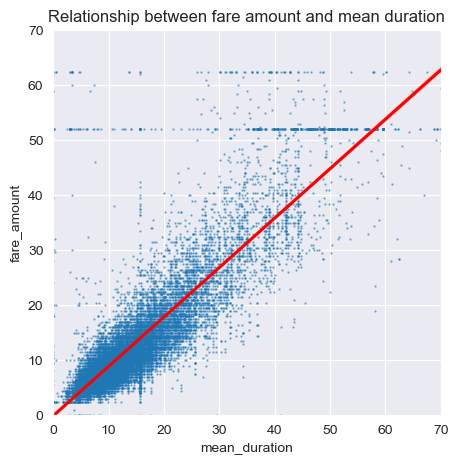

In [48]:
# Create a scatterplot to visualize the relationship between variables of interest
plt.figure(figsize=(5,5))
sns.set_style('darkgrid')

sns.regplot(x=df['mean_duration'], y=df['fare_amount'], 
            scatter_kws={'alpha':0.5, 's':0.5}, 
            line_kws={'color':'red'})
plt.xlim(0,70)
plt.ylim(0,70)
plt.title('Relationship between fare amount and mean duration')
plt.show()

The `mean_duration` variable correlates with the target variable. But what are the horizontal lines around fare amounts of 52 dollars and 63 dollars? What are the values and how many are there?

You know what one of the lines represents. 62 dollars and 50 cents is the maximum that was imputed for outliers, so all former outliers will now have fare amounts of \$62.50. What is the other line?

Check the value of the rides in the second horizontal line in the scatter plot.

In [49]:
df[df['fare_amount']==52]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,...,5.54,0.3,72.92,36.800000,236 132,19.211667,40.500000,Sunday,March,0
47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,...,0.00,0.3,52.80,66.850000,132 163,19.229000,52.941667,Saturday,June,0
95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,...,0.00,0.3,52.80,0.966667,132 132,2.255862,3.021839,Saturday,November,0
103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,2,...,0.00,0.3,52.80,29.183333,132 79,19.431667,47.275000,Wednesday,December,0
80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,1,...,5.76,0.3,73.20,29.483333,132 234,17.654000,49.833333,Sunday,September,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1690610,1,2017-01-20 18:05:09,2017-01-20 19:12:50,1,15.40,2,N,211,132,2,...,0.00,0.3,57.30,67.683333,211 132,16.580000,61.691667,Friday,January,1
20742961,1,2017-03-12 17:56:04,2017-03-12 18:40:47,2,23.00,2,N,230,132,2,...,5.54,0.3,58.34,44.716667,230 132,18.148750,56.850000,Sunday,March,0
52171010,2,2017-06-19 20:24:09,2017-06-19 21:01:04,3,20.96,2,N,132,261,1,...,0.00,0.3,58.30,36.916667,132 261,22.115000,51.493750,Monday,June,0
9039930,2,2017-02-08 18:13:26,2017-02-08 19:34:11,5,10.64,1,N,170,70,1,...,5.54,0.3,74.18,80.750000,170 70,10.640000,80.750000,Wednesday,February,1


* There are 514 rows where the fare amount is $52.

Examine the first 30 of these trips.

In [50]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)
df[df['fare_amount']==52].head(30)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,36.800000,236 132,19.211667,40.500000,Sunday,March,0
47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,66.850000,132 163,19.229000,52.941667,Saturday,June,0
95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,0.966667,132 132,2.255862,3.021839,Saturday,November,0
103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,29.183333,132 79,19.431667,47.275000,Wednesday,December,0
80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,29.483333,132 234,17.654000,49.833333,Sunday,September,0
16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84,39.833333,132 48,18.761905,58.246032,Tuesday,February,1
55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,15.616667,228 88,4.730000,15.616667,Monday,June,0
65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,45.450000,132 48,18.761905,58.246032,Thursday,August,0
80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,42.850000,186 132,17.096000,42.920000,Tuesday,September,0
33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80,71.583333,132 148,17.994286,46.340476,Sunday,April,0


* From the above table the location 132 was involved either in pick up location or drop off location.
* All the values have the RatecodeID of 2.

### Task 5. Isolate modeling variables

Drop features that are redundant, irrelevant, or that will not be available in a deployed environment.

In [51]:
df_update = df.drop(['RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'extra',\
                     'extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge', 'total_amount', \
                     'trip_distance', 'duration', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',\
                     'pickup_dropoff', 'day', 'month', 'tip_amount', 'payment_type'],\
                    axis=1)

In [52]:
df_update.head()

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
24870114,2,6,13.0,3.521667,22.847222,0
35634249,1,1,16.0,3.108889,24.470370,0
106203690,1,1,6.5,0.881429,7.250000,1
38942136,2,1,20.5,3.700000,30.250000,0
30841670,2,1,16.5,4.435000,14.616667,0


### Task 6. Pair plot

Create a pairplot to visualize pairwise relationships between `fare_amount`, `mean_duration`, and `mean_distance`.

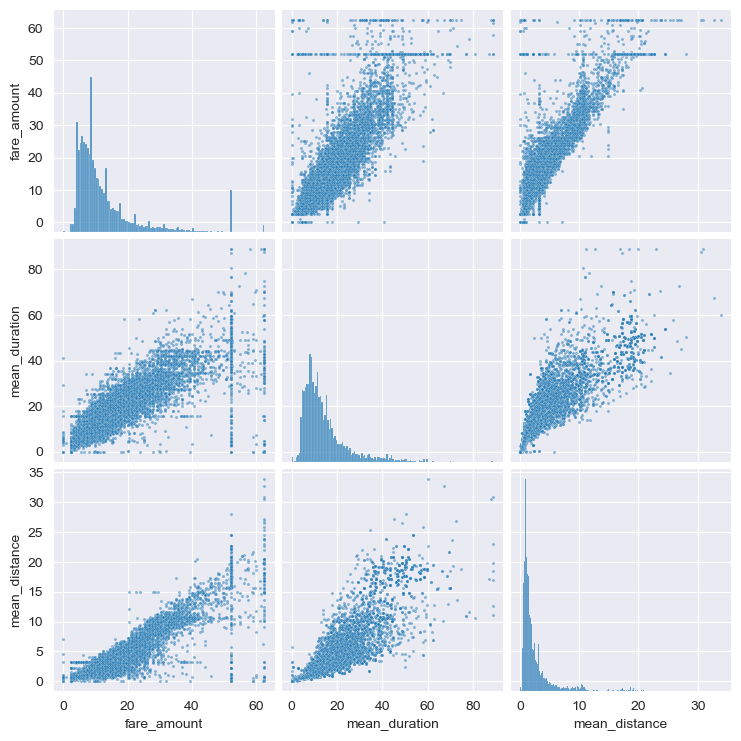

In [53]:
# Create a pairplot to visualize pairwise relationships between variables in the data
sns.pairplot(df_update[['fare_amount', 'mean_duration', 'mean_distance']], 
             plot_kws={'s':5, 'alpha':0.5});

These variables all show linear correlation with each other. Investigate this further.

### Task 7. Identify correlations

Next, code a correlation matrix to help determine most correlated variables.

In [54]:
# Correlation matrix to help determine most correlated variables
df_update.corr()

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
VendorID,1.000000,0.266463,0.001045,0.004741,0.001876,-0.002874
passenger_count,0.266463,1.000000,0.014942,0.013428,0.015852,-0.022035
fare_amount,0.001045,0.014942,1.000000,0.910185,0.859105,-0.020075
mean_distance,0.004741,0.013428,0.910185,1.000000,0.874864,-0.039725
mean_duration,0.001876,0.015852,0.859105,0.874864,1.000000,-0.021583
rush_hour,-0.002874,-0.022035,-0.020075,-0.039725,-0.021583,1.000000


Visualize a correlation heatmap of the data.

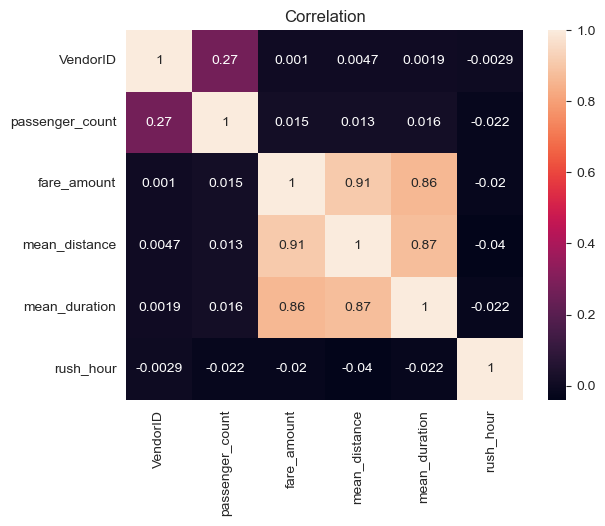

In [55]:
# Create correlation heatmap
sns.heatmap(df_update.corr(), annot=True)
plt.title('Correlation')
plt.show()

* The `mean_distance` and `mean_duration` are highly correlated with the response variable `fare_amount`.
* The `mean_distance` and `mean_duration` are highly correlated with each other as well.
* Highly correlated variables are bad for regression models. 
* But we will try to use both of these variables in our model.

<img src="images/Construct.png" width="100" height="100" align=left>

## PACE: **Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.


### Task 8a. Split data into outcome variable and features

In [56]:
df_update.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22699 entries, 24870114 to 17208911
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.2 MB


Set your X and y variables. X represents the features and y represents the outcome (target) variable.

In [57]:
# Remove the target column from the features
X = df_update.drop(columns='fare_amount')

# Set y variable
y = df_update['fare_amount']

# Display first few rows
X.head()

,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
24870114,2,6,3.521667,22.847222,0
35634249,1,1,3.108889,24.470370,0
106203690,1,1,0.881429,7.250000,1
38942136,2,1,3.700000,30.250000,0
30841670,2,1,4.435000,14.616667,0


### Task 8b. Pre-process data


Dummy encode categorical variables

In [58]:
# Convert VendorID to string
X['VendorID'] = X['VendorID'].astype(str)
# Get dummies
X = pd.get_dummies(X, drop_first=True)
X.head()

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
24870114,6,3.521667,22.847222,0,1
35634249,1,3.108889,24.470370,0,0
106203690,1,0.881429,7.250000,1,0
38942136,1,3.700000,30.250000,0,1
30841670,1,4.435000,14.616667,0,1


### Normalize the data

Use `StandardScaler()` and `fit_transform()` to standardize the X variables. Assign the results to a variable called `X_scaled`.

In [59]:
# Standardize the X variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[ 3.39065627  0.17093801  0.83195364 -0.64959666  0.8931955 ]
 [-0.4997803   0.05495383  0.99296921 -0.64959666 -1.11957573]
 [-0.4997803  -0.57092814 -0.7152838   1.53941679 -1.11957573]
 ...
 [-0.4997803  -0.62633441 -0.77886169 -0.64959666  0.8931955 ]
 [-0.4997803  -0.23485053  0.21719198 -0.64959666  0.8931955 ]
 [-0.4997803  -0.40359028 -0.50145366 -0.64959666 -1.11957573]]


### Split data into training and test sets

Create training and testing sets. The test set should contain 20% of the total samples. Set `random_state=0`.

In [60]:
# Create training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

Instantiate your model and fit it to the training data.

In [61]:
# Fit your model to the training data
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

### Task 8c. Evaluate model

### Train data

Evaluate your model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [62]:
# Evaluate the model performance on the training data
print('Coefficient of determination: ', LR.score(X_train, y_train))

Coefficient of determination:  0.8398434585044774


In [63]:
y_pred = LR.predict(X_train)

In [64]:
print('R^2: ', r2_score(y_train, y_pred))
print('MAE: ',mean_absolute_error(y_train, y_pred))
print('MSE: ', mean_squared_error(y_train, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_train, y_pred)))

R^2:  0.8398434585044774
MAE:  2.1866664167754135
MSE:  17.889732963492676
RMSE:  4.229625629236313


### Test data

Calculate the same metrics on the test data.

In [65]:
# Evaluate the model performance on the testing data
print('Coefficient of determination: ', LR.score(X_test, y_test))

Coefficient of determination:  0.8682583641795454


In [66]:
y_pred_test = LR.predict(X_test)

In [67]:
print('R^2: ', r2_score(y_test, y_pred_test))
print('MAE: ',mean_absolute_error(y_test, y_pred_test))
print('MSE: ', mean_squared_error(y_test, y_pred_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred_test)))

R^2:  0.8682583641795454
MAE:  2.1336549840593864
MSE:  14.326454156998944
RMSE:  3.785030271609323


The model has a high performance on both training and testing data.


The model has high R-squared value of 86.8% on test set, which means 86.8% of variance in `fare_amount` is described by the model.

<img src="images/Execute.png" width="100" height="100" align=left>

## PACE: **Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### Task 9a. Results

Use the code cell below to get `actual`,`predicted`, and `residual` for the testing set, and store them as columns in a `results` dataframe.

In [68]:
# Create a `results` dataframe
results = pd.DataFrame({'actual': y_test, 
              'predicted': y_pred_test.ravel(), 
              'residual': y_test - y_pred_test})
results.head()

,actual,predicted,residual
102188254,14.0,12.356503,1.643497
50574134,28.0,16.314595,11.685405
14767643,5.5,6.726789,-1.226789
16019414,15.5,16.227206,-0.727206
1352127,9.5,10.536408,-1.036408


### Task 9b. Visualize model results

Create a scatterplot to visualize `actual` vs. `predicted`.

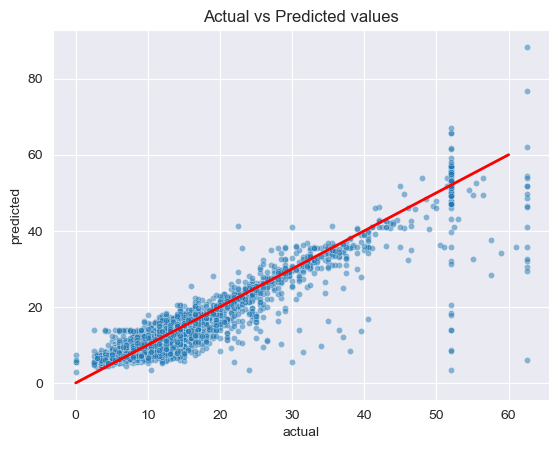

In [69]:
# Create a scatterplot to visualize `predicted` over `actual`
sns.scatterplot(x=results['actual'], 
                y=results['predicted'], 
                s=20, 
                alpha=0.5)
plt.plot([0,60], [0,60], c='red', linewidth=2)
plt.title('Actual vs Predicted values')
plt.show()

Visualize the distribution of the `residuals` using a histogram.

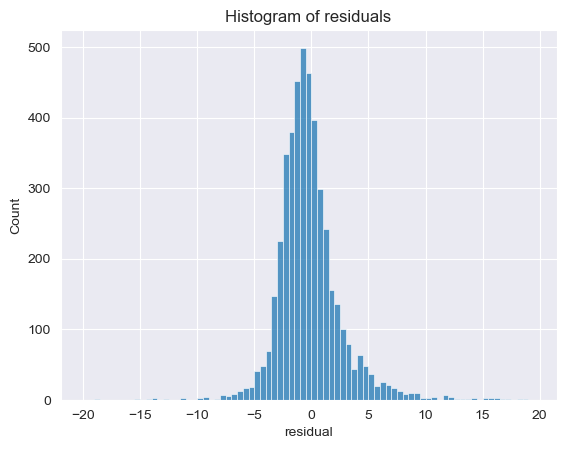

In [70]:
# Visualize the distribution of the `residuals`
sns.histplot(results['residual'], bins=np.arange(-20,20,0.5))
plt.title('Histogram of residuals')
plt.show()

In [71]:
# Calculate residual mean
results['residual'].mean()

-0.015442621528681233

* The distribution of residuals is normal. 
* The mean of residuals is -0.015. 
* The values are normally distributed around 0 whic is good.

Create a scatterplot of `residuals` over `predicted`.

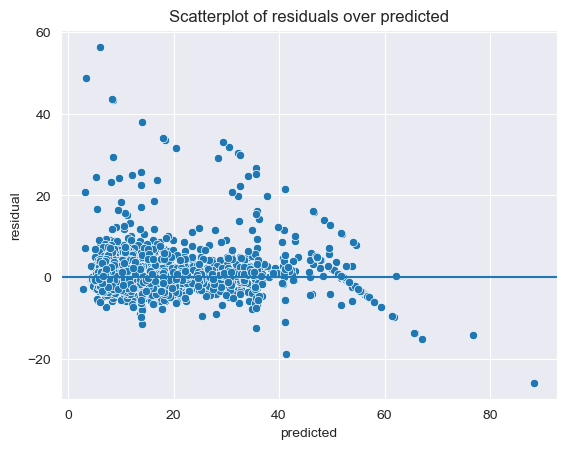

In [72]:
# Create a scatterplot of `residuals` over `predicted`
sns.scatterplot(x=results['predicted'], y=results['residual'])
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted')
plt.show()

* The model's residuals are evenly distributed above and below zero, with the exception of imputed value of 62.50 dollars and 52 dollars flat rate.

### Task 9c. Coefficients

Use the `coef_` attribute to get the model's coefficients. The coefficients are output in the order of the features that were used to train the model. Which feature had the greatest effect on trip fare?

In [73]:
# Output the model's coefficients
coefficients = pd.DataFrame(LR.coef_, index=X.columns).T
coefficients

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,0.030755,7.102335,2.806779,0.110278,-0.054376


The coefficients reveal that `mean_distance` was the feature with the greatest weight in the model's final prediction. For every mile traveled, the fare amount increases by a mean of \\$7. Note, however, that because some highly correlated features were not removed, the confidence interval of this assessment is wider.

### Task 9d. Conclusion

1. What are the key takeaways from this notebook?



2. What results can be presented from this notebook?



1. The data must be explored, analyzed and cleaned before building a regression model. Select only relevant features, transform existing features and create new features which will help the model to predict better. Train the model on potential features then test the model. Then finally communicate the results.

2. The results which can be presented are model coefficients, SSR, MAE, MSE, RMSE, R^2 and all of the resulting visualization.